#**Introduction to the Project**

Welcome to the project titled "**[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)**"!

**Team Mates**

1. Bhima Rao (5D0)
2. P Varshini (5E2)
3. Shubham Yadav (5G8)
4. V Mohan Ganesh (5I4)

This project under the guidance of an experienced supervisor  "**Dr. K. N. BRAHMAJI RAO**".



The aim of this project is to analyze a dataset of healthcare information from **Pima Indians in Arizona** to better understand the factors that contribute to the incidence of diabetes. The dataset includes information such as age, BMI, and glucose levels, among other variables, and we will use various data analysis and machine learning techniques to gain insights into the relationships between these variables and the presence of diabetes.

We will be using Python programming language and various libraries such as pandas, NumPy, and scikit-learn to explore and analyze the data, as well as to develop predictive models. We hope that the results of our analysis will contribute to the field of healthcare research and ultimately help to prevent and treat diabetes more effectively.

In this notebook, we will provide an overview of the project and the dataset, and we will walk you through our data analysis and modeling process step by step. So, let's have a look at the dataset first!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**About Dataset**

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?



## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

random_state=2023

### Read csv

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECT/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### EDA

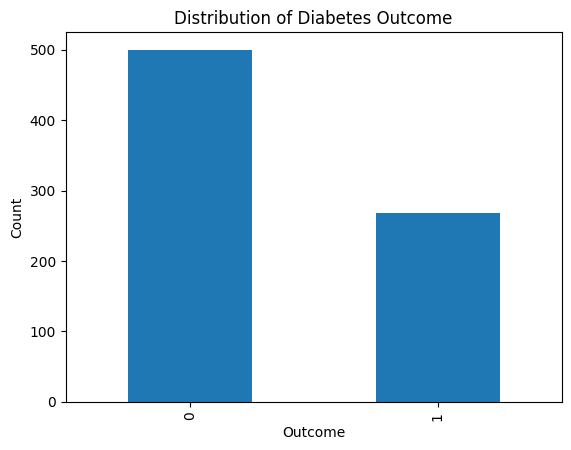

In [ ]:
# Create a bar plot for the target variable "Outcome"
df["Outcome"].value_counts().plot(kind="bar")

# Add labels and title to the plot
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")

# Display the plot
plt.show()

<Figure size 1500x1500 with 0 Axes>

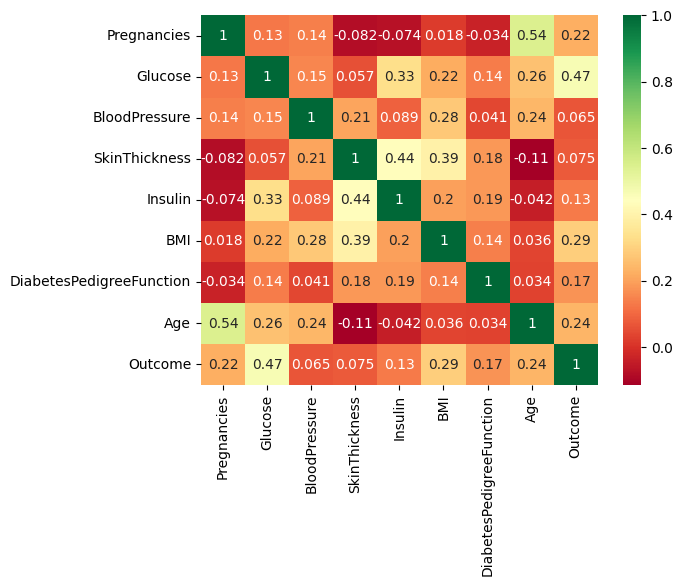

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(), annot =True,cmap='RdYlGn')
plt.figure(figsize = (15,15))

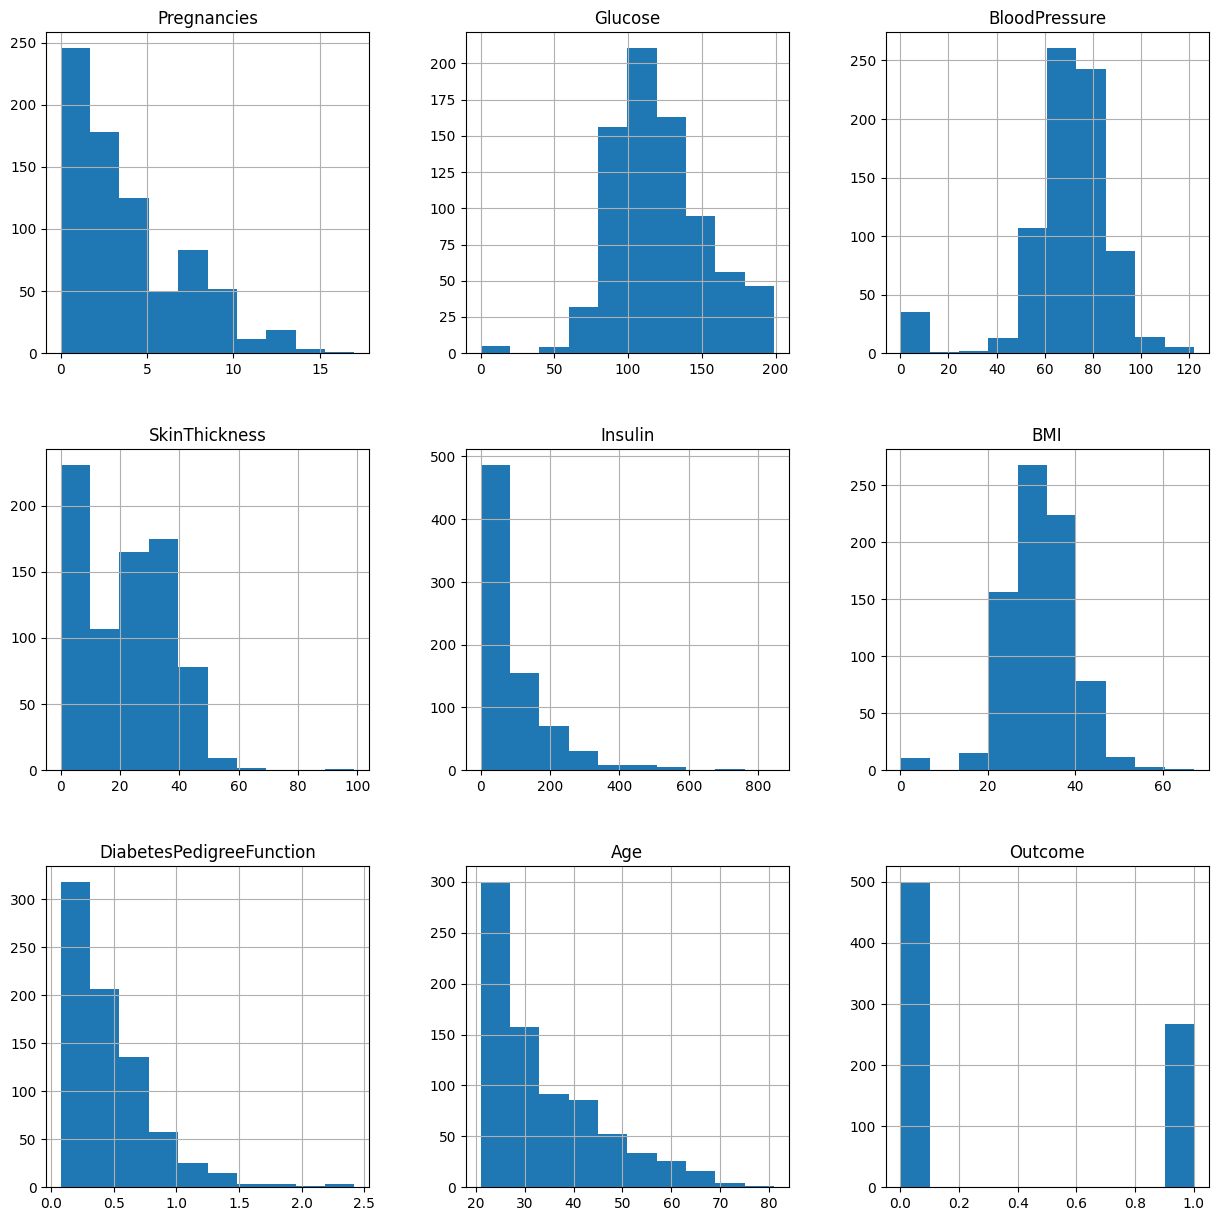

In [ ]:
df.hist(figsize=(15,15))
plt.show()

## Feature Engineering

### Train Test Split

The **stratify** parameter in scikit-learn's **train_test_split**() function is used to ensure that the train and test splits have the same proportion of classes as the original dataset.

When working with classification problems, it is important to ensure that the distribution of classes in the training and test sets is representative of the distribution in the original dataset. If the dataset is imbalanced, meaning that one class is much more prevalent than the others, then it is important to use the stratify parameter to ensure that the classes are evenly distributed between the training and test sets.

Therefore, you should set the stratify parameter to the target variable y in your dataset. This ensures that the train and test splits have the same proportion of classes as the original dataset. Here's an example of how you could use stratify parameter:

The **random state** hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions.

In [ ]:
#train_test_splitting of the dataset

x = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=random_state,stratify=y)

In [ ]:
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

614 154
614 154


## Models

### **Logistic Regression**

In [ ]:
lrc = LogisticRegression()
lrc.fit(x_train,y_train)
y_pred=lrc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

def accuracy(y_test, y_pred):
  print()
  print("Accuracy score is:", accuracy_score(y_test, y_pred))
  print()

def evaluate_model(y_test, y_pred):
    print("Classification Report is:")
    print()
    print(classification_report(y_test, y_pred))
    print()
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print()
    print("R2 score is:", r2_score(y_test, y_pred))
    print()
    print("ROC AUC score is:", roc_auc_score(y_test, y_pred))
    print()
    plot_confusion_matrix(y_test, y_pred)


Accuracy score is: 0.7987012987012987

Classification Report is:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154


Mean Squared Error: 0.2012987012987013

R2 score is: 0.11592592592592588

ROC AUC score is: 0.764074074074074



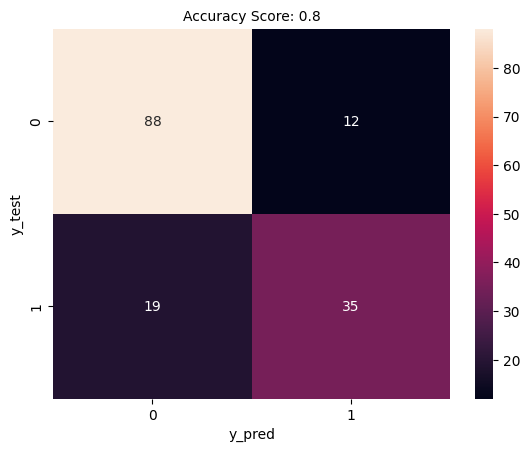

In [ ]:
accuracy(y_test, y_pred)
evaluate_model(y_test, y_pred)

### XGBoost

In [ ]:
# Define the XGBoost classifier and set hyperparameters
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)

# Train the XGBoost classifier on the training set
xgb_clf.fit(x_train,y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(x_test)


Accuracy score is: 0.7727272727272727

Classification Report is:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154


Mean Squared Error: 0.22727272727272727

R2 score is: 0.0018518518518517713

ROC AUC score is: 0.744074074074074



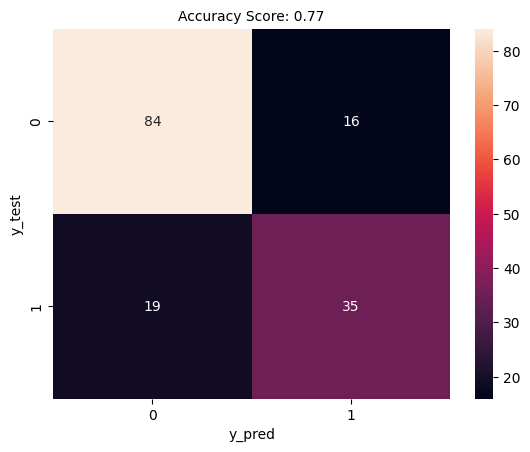

In [ ]:
accuracy(y_test, y_pred)
evaluate_model(y_test, y_pred)

# Decision Tree

In [ ]:
# Define the Decision Tree classifier and set hyperparameters
dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train the Decision Tree classifier on the training set
dt_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(x_test)


Accuracy score is: 0.7662337662337663

Classification Report is:

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


Mean Squared Error: 0.23376623376623376

R2 score is: -0.026666666666666616

ROC AUC score is: 0.7220370370370369



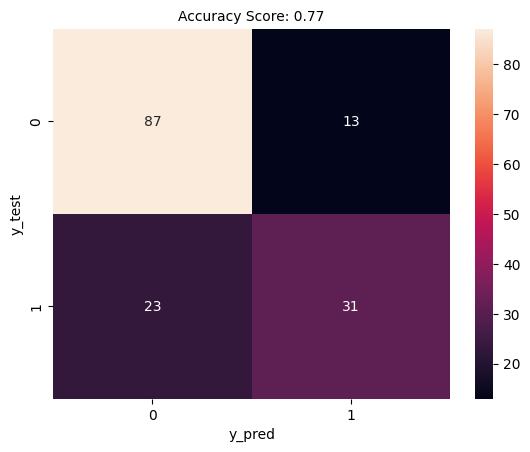

In [ ]:
accuracy(y_test, y_pred)
evaluate_model(y_test, y_pred)

## LightGBM

In [ ]:
# Convert the dataset into LightGBM format
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

# Define the LightGBM classifier and set hyperparameters
params = {'objective': 'binary', 'metric': 'binary_logloss', 'max_depth': 3, 'learning_rate': 0.1}
lgb_clf = lgb.train(params, train_data, valid_sets=[test_data])

# Make predictions on the test set
y_pred = lgb_clf.predict(x_test)
y_pred = [round(pred) for pred in y_pred]

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[1]	valid_0's binary_logloss: 0.618515
[2]	valid_0's binary_logloss: 0.595679
[3]	valid_0's binary_logloss: 0.575788
[4]	valid_0's binary_logloss: 0.559863
[5]	valid_0's binary_logloss: 0.546974
[6]	valid_0's binary_logloss: 0.53561
[7]	valid_0's binary_logloss: 0.524005
[8]	valid_0's binary_logloss: 0.51645
[9]	valid_0's binary_logloss: 0.509268
[10]	valid_0's binary_logloss: 0.502532
[11]	valid_0's binary_logloss: 0.498345
[12]	valid_0's binary_logloss: 0.495476
[13]	valid_0's binary_logloss: 0.492606
[L


Accuracy score is: 0.7597402597402597

Classification Report is:

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154


Mean Squared Error: 0.24025974025974026

R2 score is: -0.055185185185185226

ROC AUC score is: 0.7340740740740741



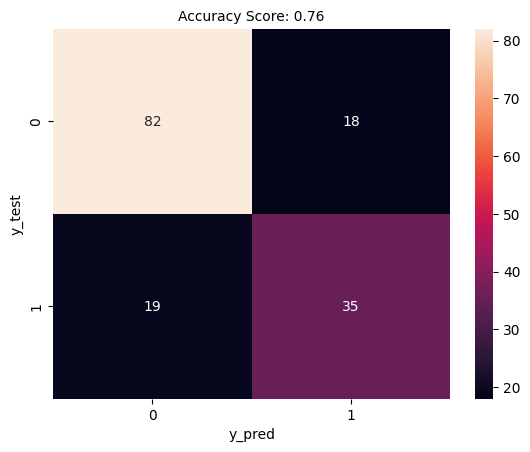

In [ ]:
accuracy(y_test, y_pred)
evaluate_model(y_test, y_pred)

### Gradient Boosting Classifier

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)


Accuracy score is: 0.7662337662337663

Classification Report is:

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154


Mean Squared Error: 0.23376623376623376

R2 score is: -0.026666666666666616

ROC AUC score is: 0.7348148148148149



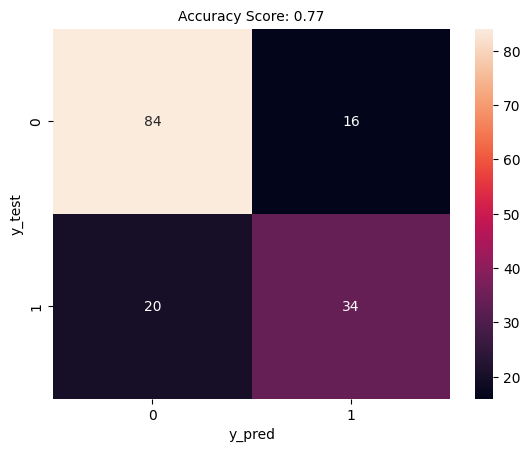

In [ ]:
accuracy(y_test, y_pred)
evaluate_model(y_test, y_pred)

## Random Forest classifier

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)


Accuracy score is: 0.7597402597402597

Classification Report is:

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Mean Squared Error: 0.24025974025974026

R2 score is: -0.055185185185185226

ROC AUC score is: 0.7298148148148148



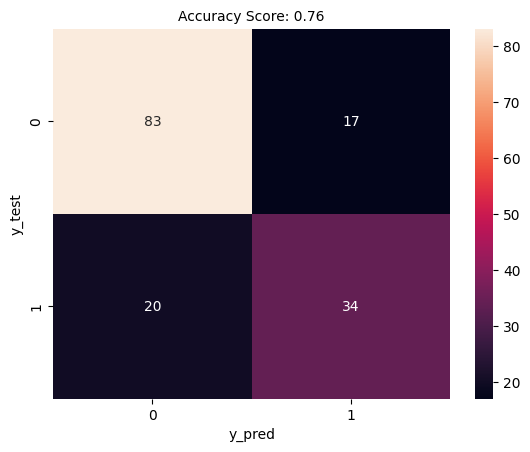

In [ ]:
accuracy(y_test, y_pred)
evaluate_model(y_test, y_pred)

## Comparsion for Models on the Test set

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score, roc_auc_score

def compare_models(models, x_test, y_test):
    scores = {}  # Initialize empty dictionary for storing performance metrics
    for name, model in models.items():
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        scores[name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall, 'R2 Score': r2, 'ROC AUC': roc_auc}
    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(scores, orient='index')

    # Highlight the maximum value for each performance metric
    highlight_max = lambda x: ['background-color: yellow' if v == x.max() else '' for v in x]
    df = df.style.apply(highlight_max, axis=0)

    return df

# Define dictionary of models
models = {
    'Logistic Regression': lrc,
    'XgBoost': xgb_clf,
    'Decision Tree': dt_clf,
    'Gradient Boosting Classifier':gbc,
    'Random Forest Classifier':rfc
}

# Call compare_models() function and print the resulting table
table = compare_models(models, x_test, y_test)
table


,Accuracy,F1 Score,Precision,Recall,R2 Score,ROC AUC
Logistic Regression,0.798701,0.693069,0.744681,0.648148,0.115926,0.764074
XgBoost,0.772727,0.666667,0.686275,0.648148,0.001852,0.744074
Decision Tree,0.766234,0.632653,0.704545,0.574074,-0.026667,0.722037
Gradient Boosting Classifier,0.766234,0.653846,0.680000,0.629630,-0.026667,0.734815
Random Forest Classifier,0.759740,0.647619,0.666667,0.629630,-0.055185,0.729815


In [ ]:
def plot_metrics(df):
    # Define the performance metrics to plot
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'R2 Score', 'ROC AUC']

    # Extract the underlying DataFrame from the Styler object
    df = df.data

    # Create a horizontal bar chart for each metric
    for metric in metrics:
        plt.figure(figsize=(5, 5))
        plt.barh(df.index, df[metric])
        plt.title(metric, fontsize=14)
        plt.xlabel(metric, fontsize=12)
        plt.ylabel('Model', fontsize=12)
        plt.show()

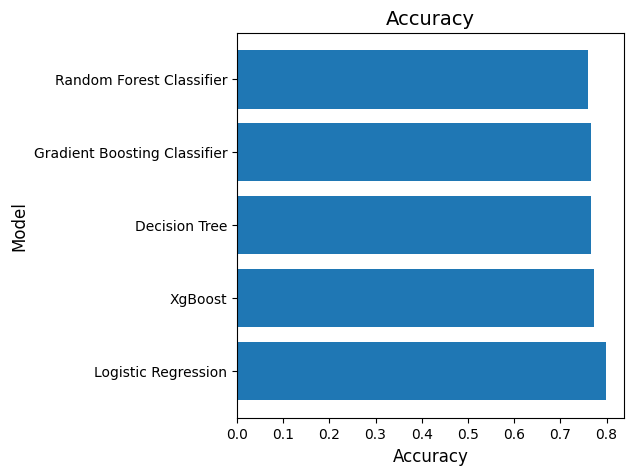

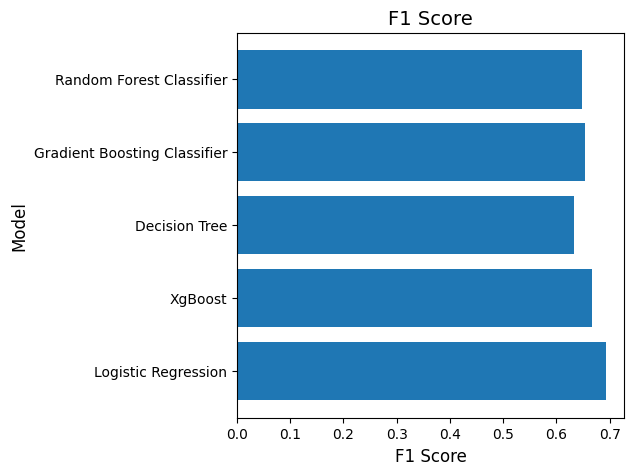

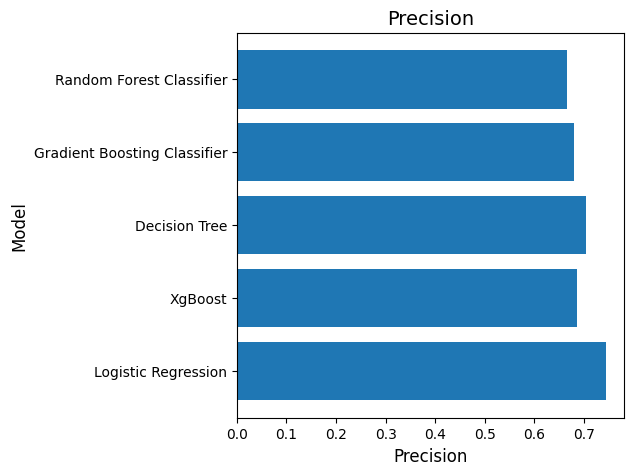

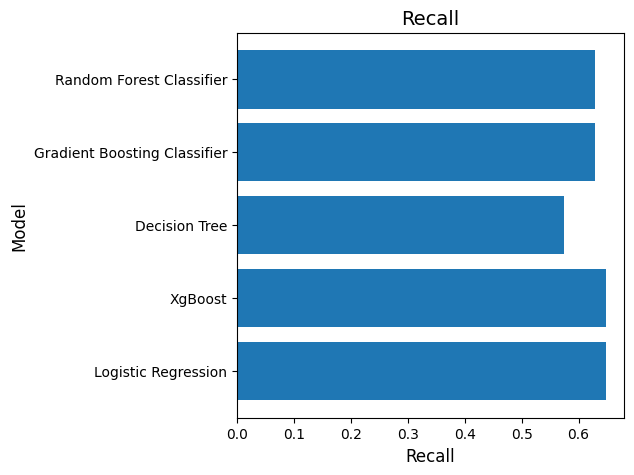

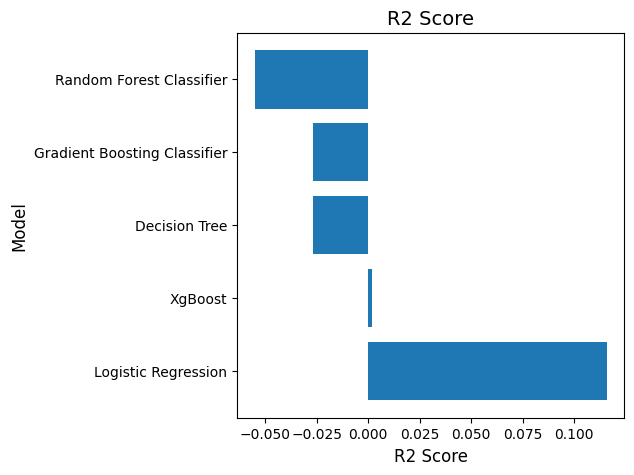

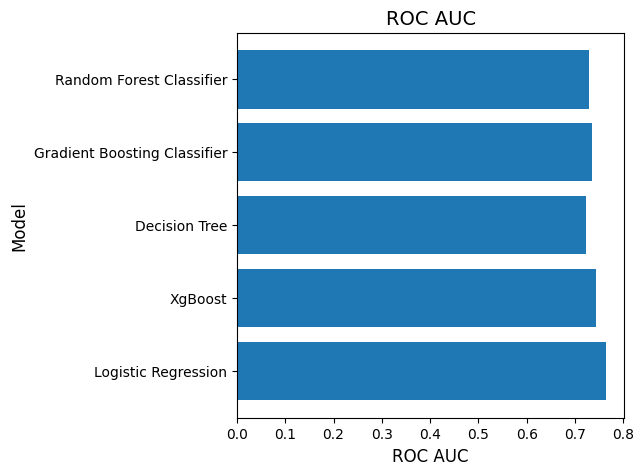

In [ ]:
plot_metrics(table)

# Save the Best Model

In [ ]:
import pickle

# Save the model to a file using pickle
with open('logistic_regression_model.pickle', 'wb') as f:
    pickle.dump(lrc, f)

# Load the model from the file
with open('logistic_regression_model.pickle', 'rb') as f:
    lrc_loaded = pickle.load(f)

In [ ]:
# Use the loaded model to make predictions
y_pred = lrc_loaded.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7987012987012987


### Best Model Inference https://huggingface.co/spaces/09subham/DiabetesPrediction?logs=build